In [1]:
# install.packages("tidymodels")
# install.packages("infer")
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tidymodels))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(infer))
suppressPackageStartupMessages(library(GGally))
options(repr.matrix.max.rows = 6)
options(repr.plot.width = 6, repr.plot.height = 6)
set.seed(100)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


## Climate Change: Study temperature and precipitation in historical vs contemporary weather records   
**STAT 201  Project Proposal    
Group 17: Fiona Wang, Serena Feng, Maggie Ruan, Yun Xing    
Date:         March 03, 2022**

## Introduction

Climate change refers to long-term shifts in temperatures and weather patterns (United Nations, n.d.-b). Although the main cause for climate change varies from the raising concretion of greenhouse gases in the atmosphere to periodical change in solar activities and remains controversial, the effects of climate change are more universally observed. United Nations (n.d.-a) summarizes the effects of climate change as: hotter temperatures, more severe storms, increased drought, etc. The group intends to obtain data from a Canadian weather station and to study the presence of these effects of climate change from some historical years to the present.  
  
The Canadian Climate and Weather Database provides weather records from numerous weather stations across Canada. Each weather station contains weather records in hourly, daily, and monthly formats. In order to obtain a meaningful and relatively large time span, the group queried stations with data available between 1950 and 2022. The database returned 8796 weather stations, from which, the group randomly selected **ABBOTSFORD A** weather station in BC to use for this study (Historical Data, 2021, November 25).  
  
The group intends to choose daily temperature and daily precipitation as the random variable across two categories - historical vs contemporary. In both variables, the group chooses to study the parameter mean. We believe that the difference in mean in daily temperature and precipitation can aid us to study the claimed effect of climate change: hotter temperature and increased drought (United Nations, n.d.-a).  

## Methodology

### Data Importing, Cleaning, and Wrangling
  
We first downloaded and imported daily data from 1950 to 1955 and 2000 to 2005.

In [2]:
climate_1951 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1951_P1D.csv", show_col_types = FALSE)
climate_1952 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1952_P1D.csv", show_col_types = FALSE)
climate_1953 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1953_P1D.csv", show_col_types = FALSE)
climate_1954 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1954_P1D.csv", show_col_types = FALSE)
climate_1955 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_1955_P1D.csv", show_col_types = FALSE)
climate_2001 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2001_P1D.csv", show_col_types = FALSE)
climate_2002 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2002_P1D.csv", show_col_types = FALSE)
climate_2003 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2003_P1D.csv", show_col_types = FALSE)
climate_2004 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2004_P1D.csv", show_col_types = FALSE)
climate_2005 <- read_csv("https://raw.githubusercontent.com/yxing6/STAT201-GroupProject-Climate/main/Data/en_climate_daily_BC_1100030_2005_P1D.csv", show_col_types = FALSE)


Next, we combined the yearly data frames and mutated a column to indicate the time of the weather records. The data in the 1950s are labeled as `historical` and the data in the 2000s are labeled as `contemporary`. We then further combined these two data frames to serve as the raw sample for this study.
      
The raw sample contains 31 variables of weather measurements in which we decided to use the following as our possible parameters: 
- `Year`: the year of the weather record 
- `Month`: the month of weather record
- `Day`: the data of weather record
- `Max Temp`: maximum temperature of the day in degrees Celsius
- `Min Temp`: minimum temperature of the day in degrees Celsius
- `Mean Temp`: average temperature of the day in degrees Celsius
- `Total Precip`: total amount of precipitation measured in millimetres. 
  
The following codes demonstrate the steps of data cleaning and wrangling into a tidy format:


In [3]:
climate_historical <- 
    rbind(climate_1951, climate_1952, climate_1953, climate_1954, climate_1955) %>%
    mutate(Category = as.factor("historical"))

climate_contemporary <- 
    rbind(climate_2001, climate_2002, climate_2003, climate_2004, climate_2005) %>%
    mutate(Category = as.factor("contemporary"))

climate_merge <- rbind(climate_historical, climate_contemporary) 

In [4]:
climate_sample <- climate_merge %>%
    select("Category", "Year", "Month", "Day", "Max Temp (°C)", "Min Temp (°C)",
           "Mean Temp (°C)", "Heat Deg Days (°C)", "Cool Deg Days (°C)", 
           "Total Rain (mm)", "Total Precip (mm)") %>%
    rename("Max_Temp" = "Max Temp (°C)",
         "Min_Temp" = "Min Temp (°C)",
         "Mean_Temp" = "Mean Temp (°C)",
         "Heat_Deg_Days" = "Heat Deg Days (°C)",
         "Cool_Deg_Days" = "Cool Deg Days (°C)",
         "Total_Rain" = "Total Rain (mm)",
         "Total_Precip" = "Total Precip (mm)")
head(climate_sample)

Category,Year,Month,Day,Max_Temp,Min_Temp,Mean_Temp,Heat_Deg_Days,Cool_Deg_Days,Total_Rain,Total_Precip
<fct>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
historical,1951,01,01,4.4,2.8,3.6,14.4,0,21.3,21.3
historical,1951,01,02,6.1,1.1,3.6,14.4,0,32.0,32.0
historical,1951,01,03,5.0,3.3,4.2,13.8,0,0.8,1.3
historical,1951,01,04,1.1,-1.7,-0.3,18.3,0,0.0,0.0
historical,1951,01,05,3.3,-1.7,0.8,17.2,0,0.0,0.0
historical,1951,01,06,6.7,-2.2,2.3,15.7,0,0.0,0.0


*Table 1. Table of sample weather record at Abbotsford A weather station.*

### Preliminary Data Explore - Temperature

United Nations (n.d.-a) states that the temperature in the recent decade is higher than last century. Is there enough evidence to support this claim? Can we see this claimed difference in `Mean_Temp` between historical and contemporary data in the sample weather records from the Abbotsford A weather station?   
We first subset the `Mean_Temp` data and start to answer this question with a box plot.

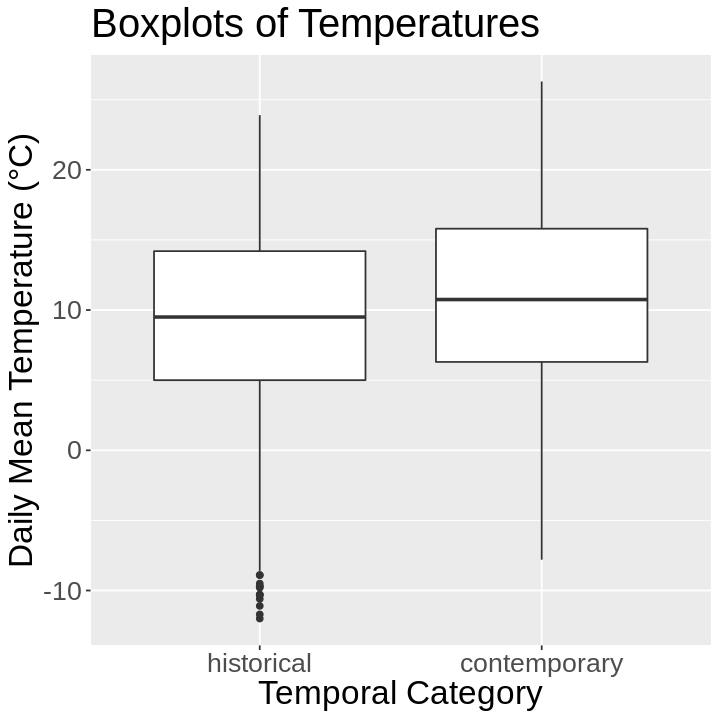

In [5]:
station_temp <- climate_sample %>%
    filter(!is.na(Mean_Temp)) %>%
    select(Category, Mean_Temp)

temp_boxplots <- station_temp %>%
    ggplot(aes(x = Category, y = Mean_Temp)) +
    geom_boxplot() +
    labs(x = "Temporal Category", y = "Daily Mean Temperature (°C)") +
    ggtitle("Boxplots of Temperatures") +
    theme(text = element_text(size = 20))
temp_boxplots

*Figure 1. Boxplot of daily mean temperature at Abbotsford A weather station*

From this boxplot, we can observe that there is a small difference in the mean of daily `Mean_Temp` between the historical and contemporary weather records. However, how big is this difference? It is also hard to tell if the distinction is due to the sampling variability or a real difference in the daily temperature.  
  
This proposal illustrates the steps we performed to generate point estimates and their associated confidence interval using bootstrapping.  
**Point estimate** The sample mean in daily temperature for the contemporary category  $\bar{x}_{contemporary}$  
**Point estimate** The sample mean in daily temperature for the historical category  $\bar{x}_{historical}$  

This proposal also illustrates the steps we took to study if there is enough evidence in our sample to contradict the null hypothesis.  
**Test Statistic**: The differences in sample mean  $\bar{x}_{contemporary} - \bar{x}_{historical}$  
**Null Hypothesis**: The mean of the contemporary daily mean temperature is the same as the mean of the historical daily mean temperature.   
**Alternative Hypothesis**: The mean of the contemporary daily mean temperature is not the same as the mean of the historical daily mean temperature.   
  
$$H_0: \bar{x}_{contemporary} - \bar{x}_{historical} = 0$$
$$H_A: \bar{x}_{contemporary} - \bar{x}_{historical} \neq 0$$

### Bootstrapping for Point Estimates - Temperature

We first visualized the sample distribution (See Figure 2). 

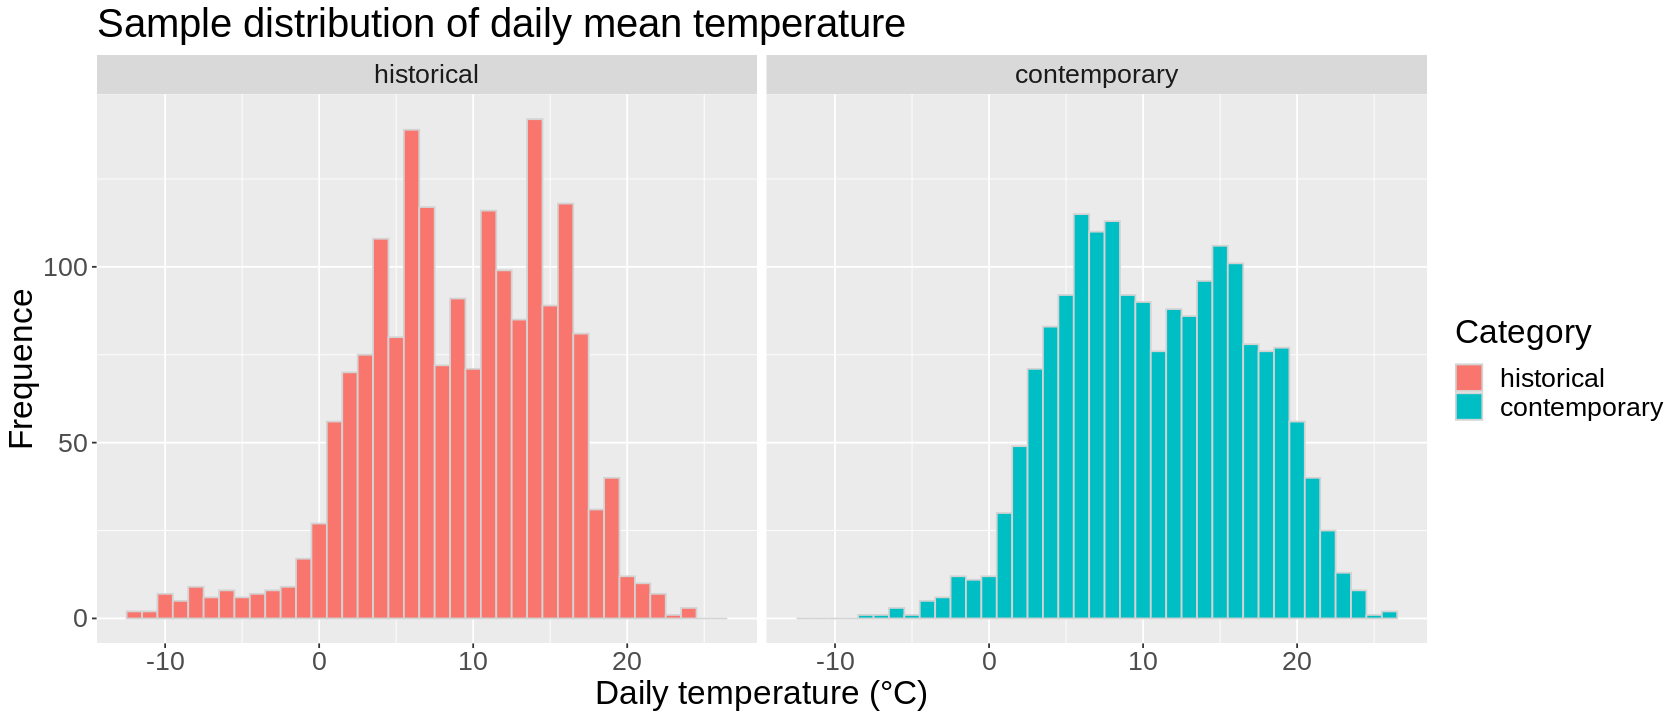

In [6]:
options(repr.plot.width = 14, repr.plot.height = 6)

station_temp_sample_distribution <- station_temp %>%
    ggplot(aes(x = Mean_Temp, fill = Category)) +
    geom_histogram(binwidth = 1, color = "lightgrey") +
    facet_grid(. ~ Category) +
    labs(x = "Daily temperature (°C)", y = "Frequence") +
    ggtitle("Sample distribution of daily mean temperature") +
    theme(text = element_text(size = 20))
station_temp_sample_distribution   

*Figure 2. Sample distribution of daily mean temperature at Abbotsford A weather station.*

We then used a bootstrap distribution to estimate the standard error in the point estimate and generate a 95% confidence interval for each point estimate. 

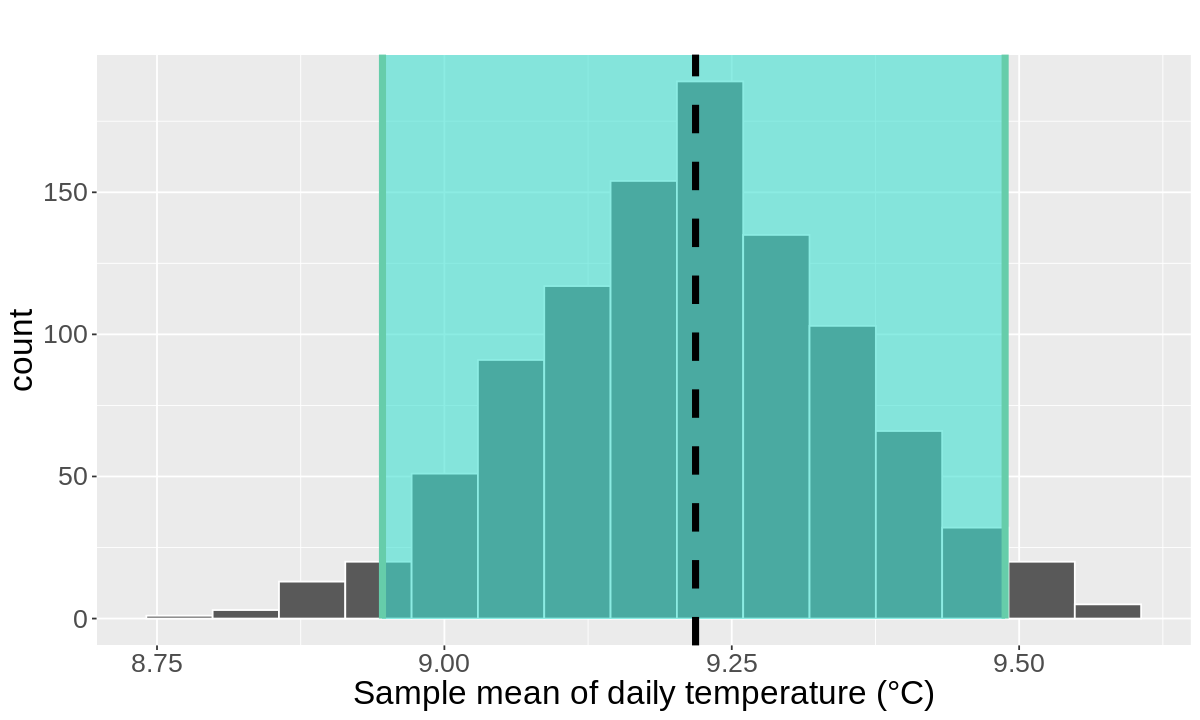

In [7]:
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(100)

temp_historical <- station_temp %>%
    filter(Category == "historical")
temp_historical_mean <- temp_historical %>%
    summarize(mean = mean(Mean_Temp)) %>%
    pull()

temp_historical_bootstrap <- temp_historical %>%
    specify(response = Mean_Temp) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")

temp_historical_percentile_ci <- temp_historical_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

visualize(temp_historical_bootstrap, binwidth = 0.05) +
    shade_ci(endpoints = temp_historical_percentile_ci) +
    labs(title = "", x = "Sample mean of daily temperature (°C)") +
    geom_vline(xintercept = temp_historical_mean, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))

*Figure 3. Bootstrap distribution of the historical sample means with 95% confidence interval.*

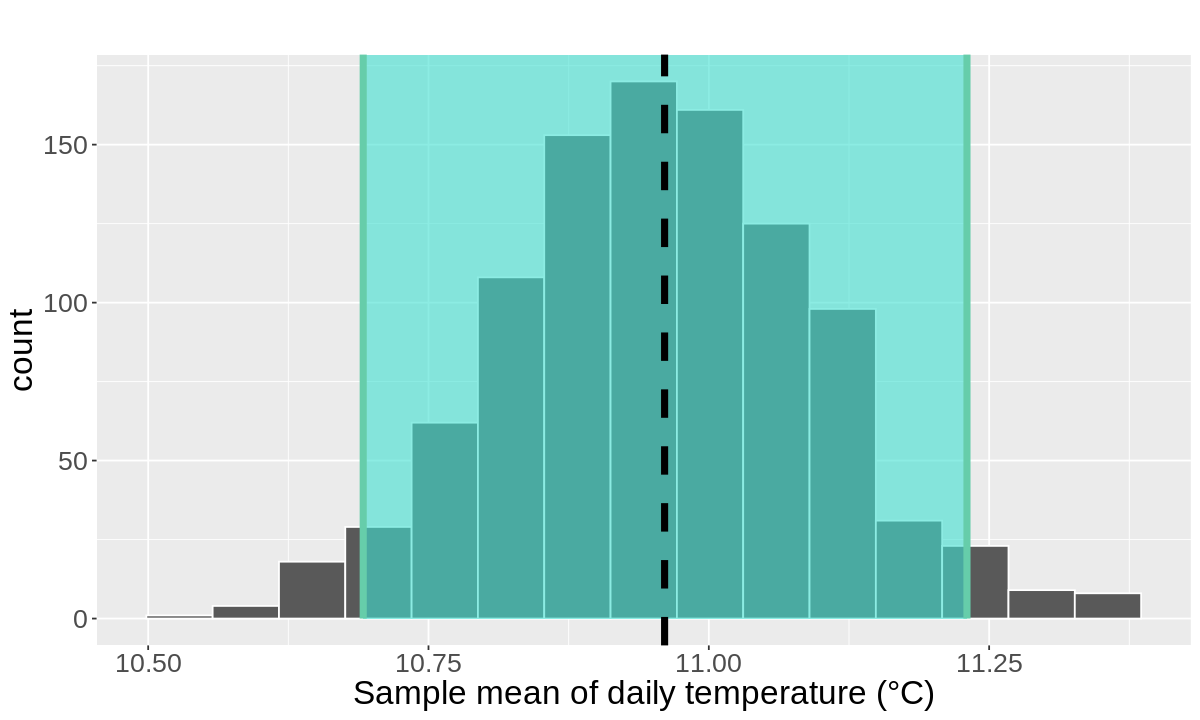

In [8]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)

temp_contemporary <- station_temp %>%
    filter(Category == "contemporary")

temp_contemporary_mean <- temp_contemporary %>%
    summarize(mean = mean(Mean_Temp)) %>%
    pull()

temp_contemporary_bootstrap <- temp_contemporary %>%
    specify(response = Mean_Temp) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "mean")

temp_contemporary_percentile_ci <- temp_contemporary_bootstrap %>%
    get_ci(level = 0.95, type = "percentile")

visualize(temp_contemporary_bootstrap, binwidth = 0.05) +
    shade_ci(endpoints = temp_contemporary_percentile_ci) +
    labs(title = "", x = "Sample mean of daily temperature (°C)") +
    geom_vline(xintercept = temp_contemporary_mean, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))

*Figure 4. Bootstrap distribution of the contemporary sample means with 95% confidence interval.*

Table 2 summarizes the point estimate for each category and reports their 95% confidence interval. 

| Category    | Point Estimate $\bar{x}$  |  Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:|
| historical|9.22|8.95|9.49
| contemporary|10.96|10.69|11.23

<center><i>Table 2. Table of the estimates for daily mean temperature.    

And we interpret this as:
- If we repeated our sampling procedure a large number of times, we expect about 95% of the confidence intervals [8.95, 9.49] to capture the value of the population parameter $\mu$ - the mean of daily temperature from 1951 to 1955.  
- If we repeated our sampling procedure a large number of times, we expect about 95% of the confidence intervals [10.69, 11.23] to capture the value of the population parameter $\mu$ - the mean of daily temperature from 2001 - 2005. 

### Hypothesis Testing - Temperature

Our initial hypothesis testing is conducted using simulation based permutation with the `infer` package. We choose a significant value of $\alpha$ = 0.05 as a standard value in the statistics field. Although this might change as we progress further into the project.  
We first calculated the observed test statistic, then generated a simulation from the null distribution. We further obtained the P-value. The following codes demonstrate the steps:

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


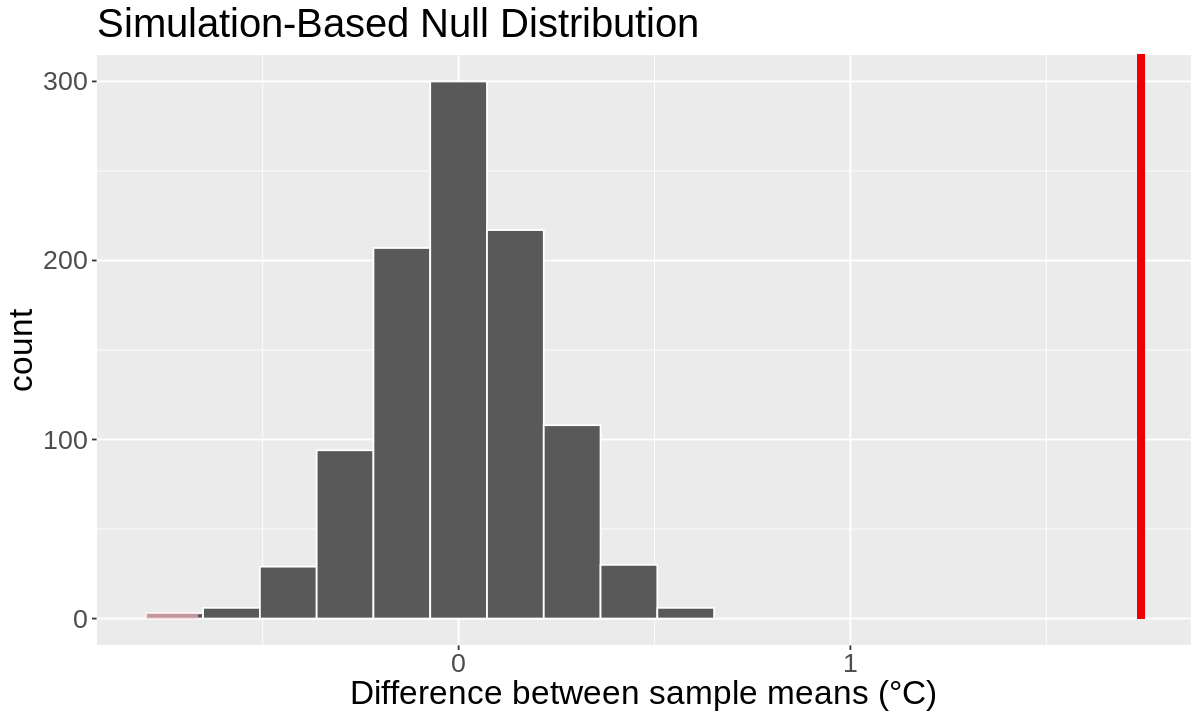

In [9]:
set.seed(100)
options(repr.plot.width = 10, repr.plot.height = 6)

obs_diff_in_temp <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

null_diff_in_temp <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_temp_plot <- null_diff_in_temp %>%
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_diff_in_temp, direction = "both") +
    xlab("Difference between sample means (°C)") +
    theme(text = element_text(size = 20))
diff_in_temp_plot

p_value <- null_diff_in_temp %>%
    get_p_value(obs_stat = obs_diff_in_temp, direction = "both")
p_value

*Figure 5. Figure of simulation distribution and P-value of daily temperature hypothesis test.*

Notice that simulation returned a p-value of 0; however, we should never report a p-value of 0 because this suggests that making a Type I error is impossible. Since we used 1000 reps to calculate the sample, we conclude:  
**The p-value is < 0.001, we reject the null hypothesis $H_0$ in favor of $H_A$ at the 5% significant level.**

We further computed the confidence interval of this test statistic with a 95% confidence interval.

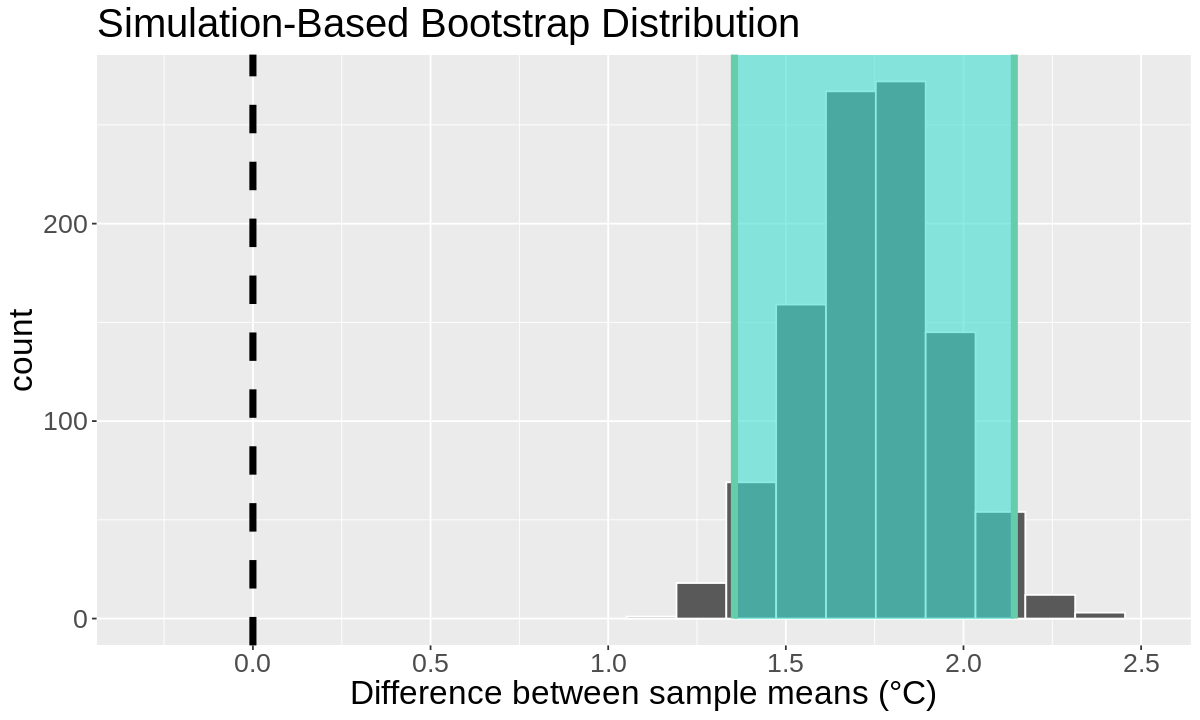

In [10]:
options(repr.plot.width = 10, repr.plot.height = 6)
set.seed(100)
diff_in_temp_bootstrap_dist <- station_temp %>%
    specify(formula = Mean_Temp ~ Category) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_temp_ci <- 
     diff_in_temp_bootstrap_dist %>% 
     get_confidence_interval(level = 0.95, type = "percentile")

diff_in_temp_ci_plot <- diff_in_temp_bootstrap_dist %>%
    visualize(bins = 10) +
    shade_ci(diff_in_temp_ci) +
    xlab("Difference between sample means (°C)") +
    scale_x_continuous(limits = c(-0.3, 2.5)) +
    geom_vline(xintercept = 0, size = 2, linetype = "dashed") +
    theme(text = element_text(size = 20))
diff_in_temp_ci_plot

*Figure 6. Figure of simulated bootstrap distribution of confidence interval of sample statistic.*

Notice that the value 0 is not included in our confidence interval, again suggesting that $\bar{x}_{contemporary}$ and $\bar{x}_{historical}$ are truly different.  

Table 3 summarizes the value we obtained for this test statistic.  95% confidence interval. 

| Test Statistic    | Observed Test Statistic |  p-value | Lower CI  |  Upper CI
| :----------: | :----------: | :----------: |:----------:| :---------:|
| $\bar{x}_{contemporary}$ - $\bar{x}_{historical}$|1.74 | <0.001|1.36|2.14|

<center><i>Table 3. Table of the estimates for test statistic difference in mean temperature.

## Methods - Plan

Moving forward, the group intends to perform a similar analysis on precipitation data and to study whether there is enough evidence in our sample to verify other effects of climate change. Through the initial data exploration, we noticed that the majority of the observations in the precipitation variable are zero, which brings the point estimate of the sample mean to a minimal level (close to zero) for both historical and contemporary categories. How to better utilize this dataset will be the next task the group plan to focus on.   
The group also plans to investage the asymptotic method as a comparison to the simulation based method for all the estimates.  


## Reference
  
Historical Data. (2021, November 25), Government of Canada, weather, climate and hazards. https://climate.weather.gc.ca/historical_data/search_historic_data_e.html  
  
United Nations. (n.d.-a), Causes and effects of climate change
https://www.un.org/en/climatechange/science/causes-and-effects-of-climate-change  

United Nations. (n.d.-b), What is climate change? https://www.un.org/en/climatechange/what-is-climate-change  



## No submit below 

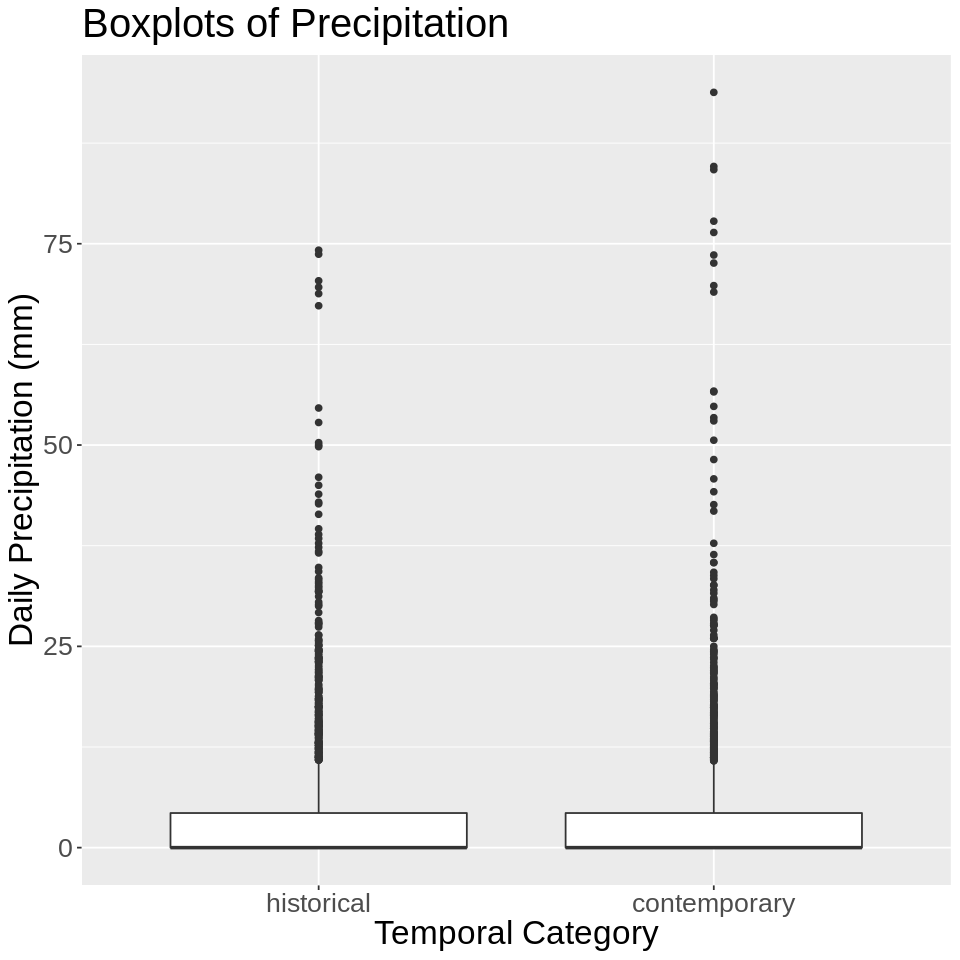

p_value
<dbl>
0.832


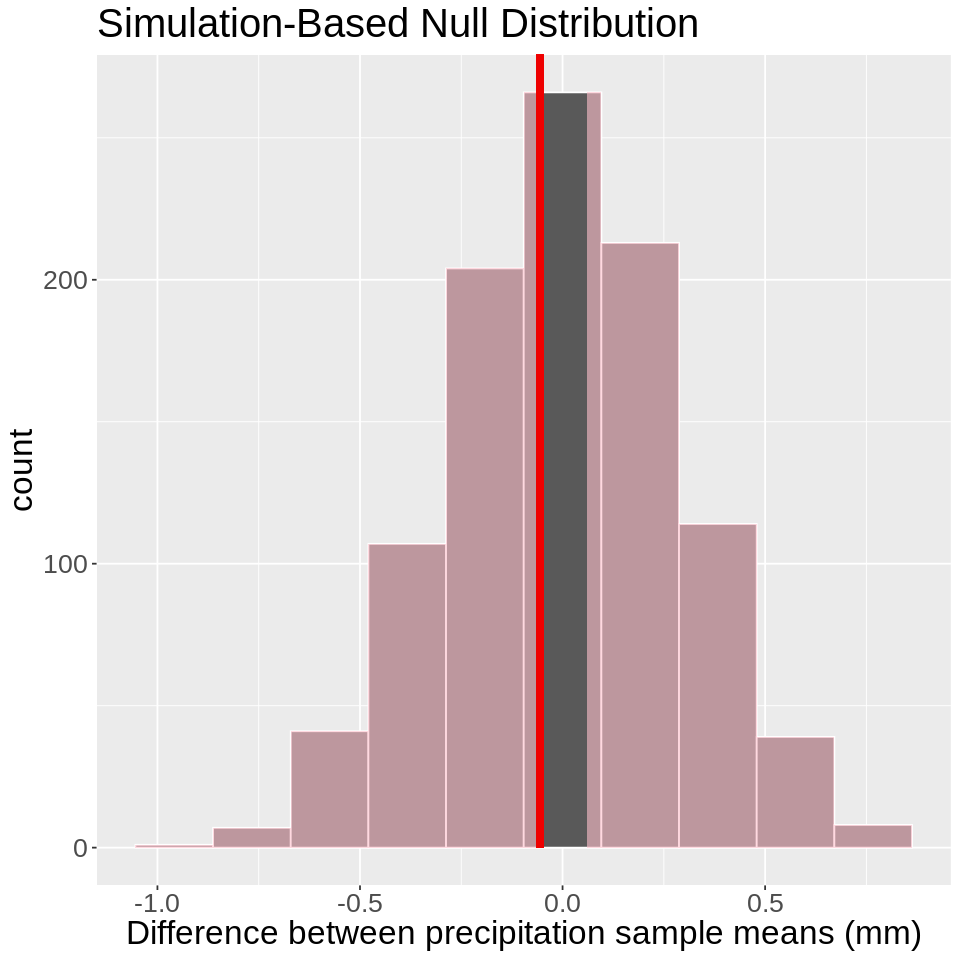

In [29]:
set.seed(100)

station_precip <- climate_sample %>%
    filter(!is.na(Total_Precip)) %>%
    select(Category, Total_Precip)

precip_boxplots <- station_precip %>%
    ggplot(aes(x = Category, y = Total_Precip)) +
    geom_boxplot() +
    labs(x = "Temporal Category", y = "Daily Precipitation (mm)") +
    ggtitle("Boxplots of Precipitation") +
    theme(text = element_text(size = 20))
precip_boxplots

In [ ]:
obs_diff_in_precip <- station_precip %>%
    specify(formula = Total_Precip ~ Category) %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

null_diff_in_precip <- station_precip %>%
    specify(formula = Total_Precip ~ Category) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("contemporary", "historical"))

diff_in_precip_plot <- null_diff_in_precip %>%
    visualize(bins = 10) +
    shade_p_value(obs_stat = obs_diff_in_precip, direction = "both") +
    xlab("Difference between precipitation sample means (mm)") +
    theme(text = element_text(size = 20))
diff_in_precip_plot

p_value_precip <- null_diff_in_precip %>%
    get_p_value(obs_stat = obs_diff_in_precip, direction = "both")
p_value_precip